In [1]:
import numpy as np
from matplotlib import pyplot as plt

from data_generation import Three_body_2D_Rick, tbp_energy_calculations
from data_generation import tbp_util
from data_generation.tbp_energy_calculations import visualize_dataset

# Dataset Visualization
some interesting facts about the data

In [2]:

config_name = "breen-et-al-00001"
tbp_util.use_config(config_name)

Setting breen-et-al-00001 as the configuration to load trajectories from


In [3]:
# allow autoreloading of imported modules whenever running a cell
# if not included, a kernel restart is needed whenever one of the imports is modified
# (Needs experimenting / import statements to work)
# %load_ext autoreload
# %autoreload 2

In [4]:
# todo read from config file
# also see tbp_util.py
G = 1.0
M = np.array([1.0, 1.0, 1.0])

Choose example trajectory from the data set to visualize.

In [5]:
example_dataset = "325"


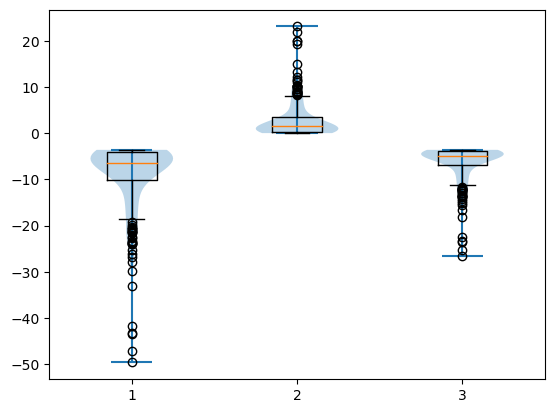

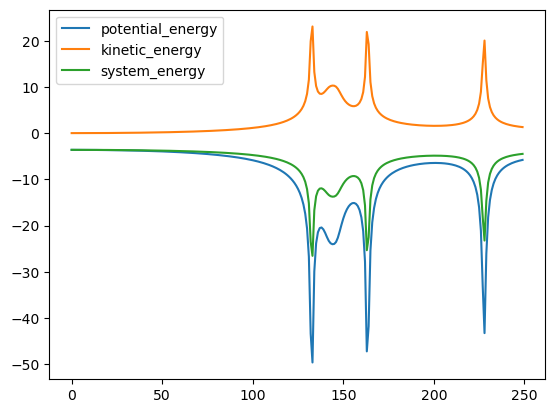

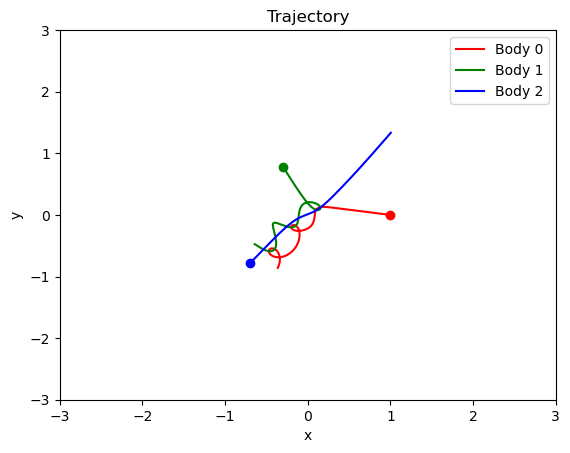

In [6]:
visualize_dataset(*tbp_util.load_dataset(example_dataset), G, M)

In [7]:
x, y, vx, vy = tbp_util.load_dataset(example_dataset)
x[0, :]

array([ 1.        , -0.30085194, -0.69914806], dtype=float128)

In [8]:
y[0, :]

array([ 0.        ,  0.78428587, -0.78428587], dtype=float128)

# deltas

In [9]:
def get_deltas(x, y, vx, vy, delta=1, scaling_factor=1):
    dx = (x[:-delta] - x[delta:]) * scaling_factor
    dy = (y[:-delta] - y[delta:]) * scaling_factor
    dvx = (vx[:-delta] - vx[delta:]) * scaling_factor
    dvy = (vy[:-delta] - vy[delta:]) * scaling_factor
    return dx, dy, dvx, dvy


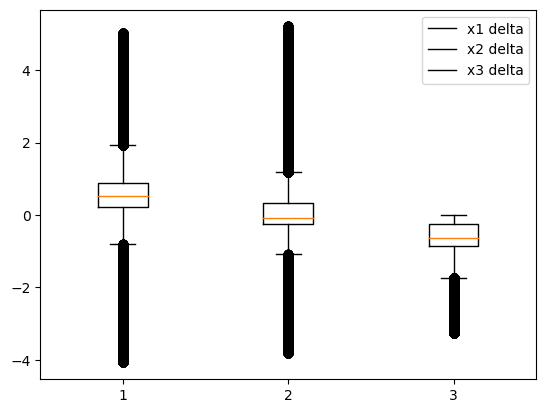

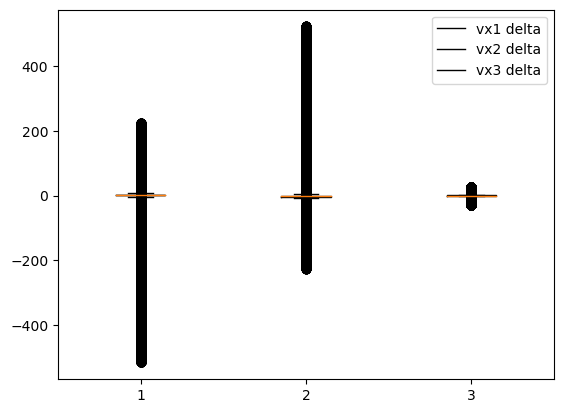

In [10]:
deltas = get_deltas(x, y, vx, vy, 1, 100000)
plt.figure()
plt.boxplot(deltas[0], showfliers=True)
plt.legend(("x1 delta", "x2 delta", "x3 delta"))
plt.savefig(f'x_delta_with_outliers.svg', format='svg', dpi=1200)
plt.show()
plt.figure()
plt.boxplot(deltas[2], showfliers=True)
plt.legend(("vx1 delta", "vx2 delta", "vx3 delta"))
plt.savefig(f'vx_delta_with_outliers.svg', format='svg', dpi=1200)
plt.show()

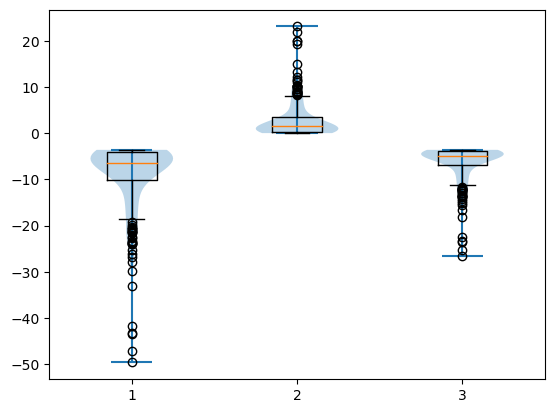

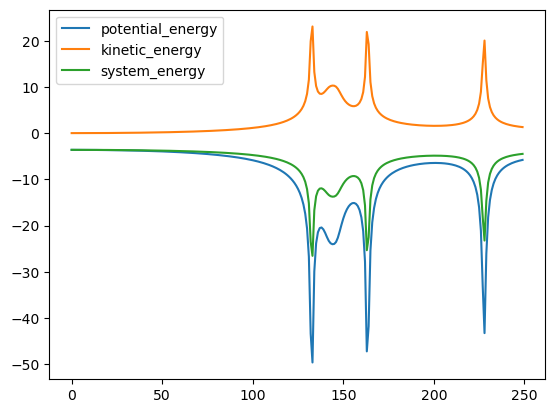

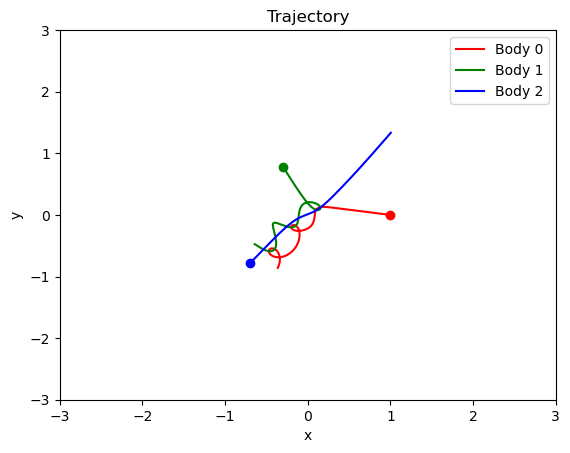

In [11]:
visualize_dataset(x, y, vx, vy, G, M)

In [12]:
from tensorflow import keras

keras.backend.set_floatx('float64')
keras.backend.floatx()

2023-07-02 16:13:27.593301: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


'float64'

# Load training data

Load training data.
A trajectory has t timesteps. For each time step it has 12 variables:
- x, y, vx, vy for each of the 3 bodies

max_datasets: maximum number of datasets to load and train on
prediction offset: how many time steps to predict into the future
downsample factor: only use one in downsample_factor data points for training, allows for k-partition validation
dataset_index: if using a downsample factor of 10, there are 10 unique sub-datasets that can be used

loaded 0 datasets


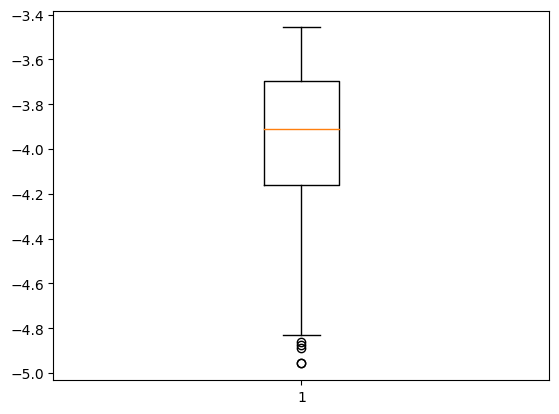

In [23]:
max_datasets = 112

starting_energies = []
for dataset, x, y, vx, vy in tbp_util.load_datasets(limit=max_datasets):
    locations = np.array([x[0], y[0]]).T
    velocities = np.array([vx[0], vy[0]]).T
    energy_values = tbp_energy_calculations.energy_values(G, M, locations, velocities)
    starting_energies.append(energy_values)

data = np.asarray(starting_energies, dtype=np.float64)
data = data[:,2]
plt.figure()
plt.boxplot(data)
plt.savefig(f'system_starting_energies_for_dataset.svg', format='svg', dpi=1200)
plt.show()